In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import scipy

In [4]:
import matplotlib.pyplot as plt

In [5]:
import statsmodels.api as sm

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
import statsmodels.formula.api as smf

In [8]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [9]:
from linearmodels import PanelOLS

In [10]:
df = pd.read_csv('data.csv')
df2 = pd.DataFrame(df)

In [11]:
ban_list = ['AFE', 'MIC', 'AFW', 'ARB', 'TSS', 'TLA', 'TMN', 'TSA', 'CSS', 'CEB', 'EAR', 'EAS', 'EAP', 'ECA', 'ECS', 'EMU', 'WLD', 'UMC', 'SST', 'SAS', 'PSS', 'PRE', 'NAC', 'MEA', 'MNA', 'LDC', 'LIC', 'LMC', 'LMY', 'LAC', 'LCN','LTE', 'OED', 'OSS', 'IBD', 'IBT', 'IDA', 'IDB', 'IDX', 'EUU', 'FCS', 'HIC', 'HPC', 'PST', 'TEC', 'TEA', 'SSA', 'SSF']

In [12]:
country_only_df = df2[~df2.economy.isin(ban_list)]
#dropped non-ISO economies

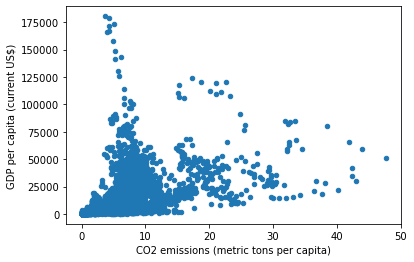

In [13]:
scatter = country_only_df.plot.scatter('CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)')

In [14]:
scatter.figure.savefig('initial scatter.pdf', dpi=300)

In [15]:
balanced_df = country_only_df.dropna(subset=['CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)'])
#dropped na values and non-ISO economies. 

In [16]:
balanced_df

,economy,time,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,PFC gas emissions,SF6 gas emissions,"Droughts, floods, extreme temperatures",Natural gas rents (% of GDP),GDP per capita (current US$),Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio
131,AFG,YR2002,43.771198,NaN,NaN,0.048671,-1189.828190,NaN,11190.0,3700.0,NaN,NaN,NaN,0.032334,179.426579,NaN,NaN,NaN
132,AFG,YR2003,42.276100,NaN,NaN,0.057008,-1123.433636,NaN,11480.0,3840.0,NaN,NaN,NaN,0.011594,190.683814,NaN,NaN,NaN
133,AFG,YR2004,49.843201,NaN,NaN,0.045700,-1604.836014,NaN,11460.0,3810.0,NaN,NaN,NaN,0.010487,211.382074,NaN,NaN,NaN
134,AFG,YR2005,40.859200,NaN,NaN,0.063927,-1272.787895,NaN,11670.0,3970.0,NaN,NaN,NaN,0.012873,242.031313,NaN,NaN,NaN
135,AFG,YR2006,37.137299,NaN,NaN,0.073393,-1163.728977,NaN,14890.0,4060.0,NaN,NaN,NaN,0.015268,263.733602,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12811,ZWE,YR2014,80.775002,NaN,NaN,0.894256,1933.483643,NaN,10820.0,5840.0,NaN,NaN,NaN,0.000000,1434.896277,NaN,NaN,NaN
12812,ZWE,YR2015,81.427200,NaN,NaN,0.897598,2499.469604,NaN,11790.0,6490.0,NaN,NaN,NaN,0.000000,1445.069702,NaN,NaN,NaN
12813,ZWE,YR2016,82.792603,NaN,NaN,0.783303,1587.372070,NaN,11380.0,6090.0,NaN,NaN,NaN,0.000000,1464.588957,133.0,NaN,NaN
12814,ZWE,YR2017,83.492996,NaN,NaN,0.718570,NaN,NaN,11560.0,6280.0,NaN,NaN,NaN,0.000000,1235.189032,NaN,25.4,NaN


In [17]:
main_df = balanced_df[balanced_df['time'] >= 'YR2000']
#for the balanced df we only want from YR2000 onwards. 
             
             
             #['YR2000','YR2001', 'YR2002', 'YR2003', 'YR2004', 'YR2005','YR2006', 'YR2007', 'YR2008', 'YR2009','YR2010', 'YR2011', 'YR2012', 'YR2013', 'YR2014', 'YR2015', 'YR2016','YR2017','YR2018']]

#main_up_df = main_df.dropna(subset=['CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)'])

In [18]:
# not the best strategy, will figure out how to make a balanced data set?
X = main_df['CO2 emissions (metric tons per capita)']
Y = main_df['GDP per capita (current US$)']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)
# plt.scatter(X, Y, color ="black")
# plt.plot(X, predictions, color ='green')

                                 OLS Regression Results                                 
Dep. Variable:     GDP per capita (current US$)   R-squared:                       0.332
Model:                                      OLS   Adj. R-squared:                  0.331
Method:                           Least Squares   F-statistic:                     1766.
Date:                          Wed, 27 Apr 2022   Prob (F-statistic):          1.06e-313
Time:                                  16:38:04   Log-Likelihood:                -39491.
No. Observations:                          3562   AIC:                         7.899e+04
Df Residuals:                              3560   BIC:                         7.900e+04
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---

C:\Users\Anjali\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
main_df.to_csv('main_df.csv')

In [20]:
## I THINK THIS IS REPEATING, COULD DELETE

#X = main_up_df['CO2 emissions (metric tons per capita)']
#Y = main_up_df['GDP per capita (current US$)']
#X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
#predictions2 = model.predict(X) 


#print_model = model.summary()
#print(print_model)




131      3037.602763
132      3054.691976
133      3031.512300
134      3068.874191
135      3088.277261
            ...     
12811    4770.857824
12812    4777.708429
12813    4543.428426
12814    4410.742563
12815    4679.718264
Length: 3562, dtype: float64


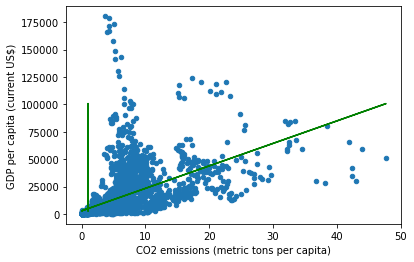

In [21]:
main_df.plot.scatter('CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)')
plt.plot(X, predictions, color ='green')

print(predictions)



In [22]:
main_up_df= main_df[main_df['CO2 emissions (metric tons per capita)'] != 0]

In [23]:
main_up_df['log_gdp'] = np.log(main_df["GDP per capita (current US$)"])

C:\Users\Anjali\AppData\Local\Temp/ipykernel_15724/1374175315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['log_gdp'] = np.log(main_df["GDP per capita (current US$)"])


In [24]:
main_up_df['log_co2'] = np.log(main_df["CO2 emissions (metric tons per capita)"])

C:\Users\Anjali\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Anjali\AppData\Local\Temp/ipykernel_15724/1265170634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['log_co2'] = np.log(main_df["CO2 emissions (metric tons per capita)"])


In [25]:
co2 = main_up_df["log_co2"]
gdp = main_up_df["log_gdp"]
co2= sm.add_constant(co2)
# had to drop some variables that had co2 = 0 because then log(co2) was becoming minus infinity 

model2 = sm.OLS(gdp, co2).fit()
predictions2 = model2.predict(co2) 

print_model_2 = model2.summary()
print(print_model_2)



                            OLS Regression Results                            
Dep. Variable:                log_gdp   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                 1.026e+04
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:38:04   Log-Likelihood:                -4156.5
No. Observations:                3551   AIC:                             8317.
Df Residuals:                    3549   BIC:                             8329.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7994      0.014    552.561      0.0

C:\Users\Anjali\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
main_up_df.describe() #summary statistics

,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,PFC gas emissions,SF6 gas emissions,"Droughts, floods, extreme temperatures",Natural gas rents (% of GDP),GDP per capita (current US$),Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio,log_gdp,log_co2
count,3551.000000,2136.000000,2183.000000,3551.000000,3049.000000,529.000000,3.551000e+03,3540.000000,529.000000,529.000000,163.000000,3452.000000,3551.000000,179.000000,1331.000000,378.000000,3551.000000,3551.000000
mean,32.753390,63.925065,2.288179,4.420334,-4462.656568,4238.821550,4.007905e+04,14544.104520,661.823062,1051.624197,1.162100,0.668753,12002.306876,91.029609,6.540571,27.664921,8.333435,0.624832
std,29.707675,30.960730,3.645057,5.432316,31775.907463,23167.979788,1.195768e+05,44829.018741,2676.616095,5149.740511,1.957511,3.184358,19350.324023,71.619599,11.490823,11.548350,1.539044,1.552101
min,0.000000,0.000000,0.054961,0.016313,-415197.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,111.927225,7.000000,0.000000,2.370000,4.717849,-4.115812
25%,6.653300,42.561891,1.620622,0.672440,-1588.137771,0.000000,2.250000e+03,570.000000,0.000000,0.000000,0.022075,0.000000,1244.360963,32.300000,0.200000,18.525000,7.126377,-0.396842
50%,23.580200,73.510850,2.240218,2.461614,-40.327332,73.100000,8.320000e+03,3515.000000,0.000000,0.000000,0.260471,0.000173,4094.348386,68.000000,1.200000,25.900000,8.317363,0.900817
75%,54.530449,89.038159,2.708990,6.299381,469.167861,755.000000,3.037000e+04,11032.500000,197.000000,301.200000,1.252664,0.174143,13537.875080,142.300000,7.100000,34.597500,9.513243,1.840451
max,98.342903,100.000000,103.157895,47.699934,118677.593750,300896.000000,1.242150e+06,546990.000000,28055.800000,57054.000000,9.226586,68.681470,180366.715198,324.100000,77.400000,74.200000,12.102747,3.864930


131      5.215707
132      5.350853
133      5.161864
134      5.448765
135      5.566795
           ...   
12811    7.703826
12812    7.707015
12813    7.590594
12814    7.516866
12815    7.660234
Length: 3551, dtype: float64


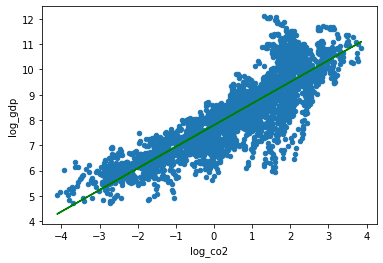

In [27]:
#scatter plot!

co2 = main_up_df["log_co2"].to_numpy().reshape(3551,1)
gdp = main_up_df["log_gdp"].to_numpy().reshape(3551,1)
model3 = LinearRegression()
model3.fit(co2, gdp)

main_up_df.plot.scatter('log_co2', 'log_gdp')
plt.plot(co2, model3.predict(co2), color ='green')
print(predictions2)




In [28]:
#main_up_df['Develop_Dummy'] = 0 if df['Salary'] < df['Salary'].median() else 1

In [29]:
mid_inc_countries = ['AGO', 'ALB', 'ARG', 'ARM', 'AZE', 'BEN', 'BGD', 'BGR', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BTN', 'BWA', 'CHN', 'CIV', 'CMR', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'DJI', 'DMA', 'DOM', 'DZA', 'ECU', 'EGY', 'FJI', 'FSM', 'GAB', 'GEO', 'GHA', 'GNQ', 'GRD', 'GTM', 'GUY', 'HND', 'IDN', 'IND', 'IRN', 'IRQ', 'JAM', 'JOR', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'LAO', 'LBN', 'LBY', 'LCA', 'LKA', 'LSO', 'MAR', 'MDA', 'MDV', 'MEX', 'MHL', 'MRT', 'MKD', 'MYS', 'MMR', 'MNE', 'MNG', 'NGA', 'NIC', 'NPL', 'NAM', 'PAK', 'PER', 'PHL', 'PNG', 'PRY', 'PSE', 'RUS', 'STP', 'SEN', 'SLB', 'SLV', 'SRB', 'SUR', 'SWZ', 'THA', 'TUN', 'TUR', 'TUV', 'TKM', 'TLS', 'TON', 'TZA', 'UKR', 'UZB', 'VCT', 'VEN', 'VNM', 'VUT', 'WSM', 'ZAF', 'ZMB', 'ZWE']
hi_inc_countries = ['AND', 'ATG', 'AUS', 'AUT', 'BHS', 'BHR', 'ARE', 'BEL', 'BRB', 'BRN', 'CAN', 'CHE', 'CHL', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HRV', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KNA', 'KOR', 'KWT', 'LIE', 'LTU', 'LUX', 'LVA', 'MLT', 'MUS', 'NOR', 'NLD', 'NRU','NZL', 'OMN', 'PAN', 'PLW', 'POL', 'PRT', 'QAT', 'ROU', 'SAU', 'SGP', 'SVK', 'SVN', 'SWE', 'SYC', 'TTO', 'URY', 'USA']
lo_inc_countries = ['AFG', 'BDI', 'BFA', 'CAF', 'COD', 'ERI', 'ETH', 'GIN', 'GMB', 'GNB', 'HTI', 'LBR', 'MDG', 'MLI', 'MOZ', 'MWI', 'NER', 'RWA', 'SDN', 'SLE', 'SOM', 'SSD', 'SYR', 'TCD', 'TGO', 'TJK', 'UGA', 'YEM']


In [30]:
def middle_income_func(economy):
    if economy in mid_inc_countries:
        return 1
    else:
        return 0

In [31]:
def low_income_func(economy):
    if economy in lo_inc_countries:
        return 1
    else:
        return 0

In [32]:
def high_income_func(economy):
    if economy in hi_inc_countries:
        return 1
    else:
        return 0

In [33]:
main_up_df['economy']

131      AFG
132      AFG
133      AFG
134      AFG
135      AFG
        ... 
12811    ZWE
12812    ZWE
12813    ZWE
12814    ZWE
12815    ZWE
Name: economy, Length: 3551, dtype: object

In [34]:
main_up_df['Middle_dummy'] = main_up_df['economy'].apply(middle_income_func)

C:\Users\Anjali\AppData\Local\Temp/ipykernel_15724/1015916212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['Middle_dummy'] = main_up_df['economy'].apply(middle_income_func)


In [35]:
main_up_df['High_dummy'] = main_up_df['economy'].apply(high_income_func)

C:\Users\Anjali\AppData\Local\Temp/ipykernel_15724/1282217178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['High_dummy'] = main_up_df['economy'].apply(high_income_func)


In [36]:
main_up_df['Low_dummy'] = main_up_df['economy'].apply(low_income_func)

C:\Users\Anjali\AppData\Local\Temp/ipykernel_15724/379893192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['Low_dummy'] = main_up_df['economy'].apply(low_income_func)


In [37]:
main_up_df.to_csv('dummy.csv')

In [38]:
main_up_df

,economy,time,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,...,Natural gas rents (% of GDP),GDP per capita (current US$),Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio,log_gdp,log_co2,Middle_dummy,High_dummy,Low_dummy
131,AFG,YR2002,43.771198,NaN,NaN,0.048671,-1189.828190,NaN,11190.0,3700.0,...,0.032334,179.426579,NaN,NaN,NaN,5.189766,-3.022674,0,0,1
132,AFG,YR2003,42.276100,NaN,NaN,0.057008,-1123.433636,NaN,11480.0,3840.0,...,0.011594,190.683814,NaN,NaN,NaN,5.250617,-2.864563,0,0,1
133,AFG,YR2004,49.843201,NaN,NaN,0.045700,-1604.836014,NaN,11460.0,3810.0,...,0.010487,211.382074,NaN,NaN,NaN,5.353667,-3.085666,0,0,1
134,AFG,YR2005,40.859200,NaN,NaN,0.063927,-1272.787895,NaN,11670.0,3970.0,...,0.012873,242.031313,NaN,NaN,NaN,5.489067,-2.750014,0,0,1
135,AFG,YR2006,37.137299,NaN,NaN,0.073393,-1163.728977,NaN,14890.0,4060.0,...,0.015268,263.733602,NaN,NaN,NaN,5.574940,-2.611927,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12811,ZWE,YR2014,80.775002,NaN,NaN,0.894256,1933.483643,NaN,10820.0,5840.0,...,0.000000,1434.896277,NaN,NaN,NaN,7.268848,-0.111763,1,0,0
12812,ZWE,YR2015,81.427200,NaN,NaN,0.897598,2499.469604,NaN,11790.0,6490.0,...,0.000000,1445.069702,NaN,NaN,NaN,7.275913,-0.108033,1,0,0
12813,ZWE,YR2016,82.792603,NaN,NaN,0.783303,1587.372070,NaN,11380.0,6090.0,...,0.000000,1464.588957,133.0,NaN,NaN,7.289330,-0.244236,1,0,0
12814,ZWE,YR2017,83.492996,NaN,NaN,0.718570,NaN,NaN,11560.0,6280.0,...,0.000000,1235.189032,NaN,25.4,NaN,7.118979,-0.330491,1,0,0


In [39]:
co2 = main_up_df[["log_co2", "Middle_dummy" , "High_dummy" ]]
gdp = main_up_df["log_gdp"]
co2= sm.add_constant(co2)

model4 = sm.OLS(gdp, co2).fit()

print_model_4 = model4.summary()
print(print_model_4)


                            OLS Regression Results                            
Dep. Variable:                log_gdp   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     5741.
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:38:05   Log-Likelihood:                -3431.3
No. Observations:                3551   AIC:                             6871.
Df Residuals:                    3547   BIC:                             6895.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.3758      0.036    203.020   

C:\Users\Anjali\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [40]:
main_up_df['Interaction_low'] =main_up_df['log_co2'] * main_up_df['Low_dummy']

C:\Users\Anjali\AppData\Local\Temp/ipykernel_15724/3728632562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['Interaction_low'] =main_up_df['log_co2'] * main_up_df['Low_dummy']


In [41]:
main_up_df['Interaction_high'] =main_up_df['log_co2'] * main_up_df['High_dummy']

C:\Users\Anjali\AppData\Local\Temp/ipykernel_15724/3715964982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['Interaction_high'] =main_up_df['log_co2'] * main_up_df['High_dummy']


In [42]:
# what if we flip our x and y and check causal implication of Kuznet's theory
X = main_up_df[["log_gdp", "Low_dummy" , "High_dummy", "Interaction_low", "Interaction_high" ]]
gdp = main_up_df["log_co2"]
X = sm.add_constant(X)

model5 = sm.OLS(gdp, X).fit()

print_model_5 = model5.summary()
print(print_model_5)

#somewhat talks about the Kuznet curve?

                            OLS Regression Results                            
Dep. Variable:                log_co2   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3732.
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:38:06   Log-Likelihood:                -3341.5
No. Observations:                3551   AIC:                             6695.
Df Residuals:                    3545   BIC:                             6732.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.0883      0.105  

C:\Users\Anjali\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [43]:
main_up_df

,economy,time,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,...,Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio,log_gdp,log_co2,Middle_dummy,High_dummy,Low_dummy,Interaction_low,Interaction_high
131,AFG,YR2002,43.771198,NaN,NaN,0.048671,-1189.828190,NaN,11190.0,3700.0,...,NaN,NaN,NaN,5.189766,-3.022674,0,0,1,-3.022674,-0.0
132,AFG,YR2003,42.276100,NaN,NaN,0.057008,-1123.433636,NaN,11480.0,3840.0,...,NaN,NaN,NaN,5.250617,-2.864563,0,0,1,-2.864563,-0.0
133,AFG,YR2004,49.843201,NaN,NaN,0.045700,-1604.836014,NaN,11460.0,3810.0,...,NaN,NaN,NaN,5.353667,-3.085666,0,0,1,-3.085666,-0.0
134,AFG,YR2005,40.859200,NaN,NaN,0.063927,-1272.787895,NaN,11670.0,3970.0,...,NaN,NaN,NaN,5.489067,-2.750014,0,0,1,-2.750014,-0.0
135,AFG,YR2006,37.137299,NaN,NaN,0.073393,-1163.728977,NaN,14890.0,4060.0,...,NaN,NaN,NaN,5.574940,-2.611927,0,0,1,-2.611927,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12811,ZWE,YR2014,80.775002,NaN,NaN,0.894256,1933.483643,NaN,10820.0,5840.0,...,NaN,NaN,NaN,7.268848,-0.111763,1,0,0,-0.000000,-0.0
12812,ZWE,YR2015,81.427200,NaN,NaN,0.897598,2499.469604,NaN,11790.0,6490.0,...,NaN,NaN,NaN,7.275913,-0.108033,1,0,0,-0.000000,-0.0
12813,ZWE,YR2016,82.792603,NaN,NaN,0.783303,1587.372070,NaN,11380.0,6090.0,...,133.0,NaN,NaN,7.289330,-0.244236,1,0,0,-0.000000,-0.0
12814,ZWE,YR2017,83.492996,NaN,NaN,0.718570,NaN,NaN,11560.0,6280.0,...,NaN,25.4,NaN,7.118979,-0.330491,1,0,0,-0.000000,-0.0


In [44]:
panel_df = main_up_df.dropna(subset=['Other greenhouse gas emissions', 'Methane emissions', 'Nitrous oxide emissions', ])

In [45]:
panel_df

,economy,time,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,...,Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio,log_gdp,log_co2,Middle_dummy,High_dummy,Low_dummy,Interaction_low,Interaction_high
131,AFG,YR2002,43.771198,NaN,NaN,0.048671,-1189.828190,NaN,11190.0,3700.0,...,NaN,NaN,NaN,5.189766,-3.022674,0,0,1,-3.022674,-0.0
132,AFG,YR2003,42.276100,NaN,NaN,0.057008,-1123.433636,NaN,11480.0,3840.0,...,NaN,NaN,NaN,5.250617,-2.864563,0,0,1,-2.864563,-0.0
133,AFG,YR2004,49.843201,NaN,NaN,0.045700,-1604.836014,NaN,11460.0,3810.0,...,NaN,NaN,NaN,5.353667,-3.085666,0,0,1,-3.085666,-0.0
134,AFG,YR2005,40.859200,NaN,NaN,0.063927,-1272.787895,NaN,11670.0,3970.0,...,NaN,NaN,NaN,5.489067,-2.750014,0,0,1,-2.750014,-0.0
135,AFG,YR2006,37.137299,NaN,NaN,0.073393,-1163.728977,NaN,14890.0,4060.0,...,NaN,NaN,NaN,5.574940,-2.611927,0,0,1,-2.611927,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,ZWE,YR2012,77.822197,28.860873,1.120253,0.923360,1827.732117,NaN,11730.0,6510.0,...,NaN,NaN,NaN,7.173934,-0.079736,1,0,0,-0.000000,-0.0
12810,ZWE,YR2013,79.305901,29.095759,1.095175,0.925816,1972.408020,NaN,11700.0,6310.0,...,NaN,NaN,NaN,7.265429,-0.077079,1,0,0,-0.000000,-0.0
12811,ZWE,YR2014,80.775002,NaN,NaN,0.894256,1933.483643,NaN,10820.0,5840.0,...,NaN,NaN,NaN,7.268848,-0.111763,1,0,0,-0.000000,-0.0
12812,ZWE,YR2015,81.427200,NaN,NaN,0.897598,2499.469604,NaN,11790.0,6490.0,...,NaN,NaN,NaN,7.275913,-0.108033,1,0,0,-0.000000,-0.0


In [54]:
def time_converter(time):
    for time in range(len(main_up_df['time'])):
        new_time = int(time[2:])
    return new_time


In [55]:
new_df = main_up_df['time'].apply(time_converter)

TypeError: 'int' object is not subscriptable

In [53]:
new_df

131      2018
132      2018
133      2018
134      2018
135      2018
         ... 
12811    2018
12812    2018
12813    2018
12814    2018
12815    2018
Name: time, Length: 3551, dtype: int64